# Part 2.2

## Libraries to import

In [4]:
import spacy
from spacy.language import Language

In [6]:
import stanza
from stanza.server import CoreNLPClient
stanza.download('en')
stanza_nlp = stanza.Pipeline(lang='en', processors='tokenize,ner')

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: en (English) ...


INFO:stanza:Downloaded file to /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package                   |
-----------------------------------------
| tokenize  | combined                  |
| mwt       | combined                  |
| ner       | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


In [7]:
from spacy.pipeline import EntityRecognizer
import pandas as pd
nlp = spacy.load("en_core_web_sm")

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

## Analysis by entity type

This part makes use of the previously stored (Part 1.2) text data of the file "preproc_texts.json", and presupposes that this file has been stored in the repository you are currently working in.

In [11]:
#extract the text from json
with open("./preproc_texts.json", "r") as f:
  data = json.load(f)

In [12]:
#separate the two keys
Female_mathematicians = data["Female_mathematicians"]
Contemporary_artists = data["Contemporary_artists"]

In [13]:
print(Female_mathematicians) #check
print(Contemporary_artists) #check

["Éva Tardos (born 1 October 1957) is a Hungarian mathematician and the Jacob Gould Schurman Professor of Computer Science at Cornell University.\nTardos's research interest is algorithms. Her work focuses on the design and analysis of efficient methods for combinatorial optimization problems on graphs or networks. She has done some work on network flow algorithms like approximation algorithms for network flows, cut, and clustering problems. Her recent work focuses on algorithmic game theory and simple auctions.\n\n\n\nTardos received her Dipl. Math in 1981 and her Ph.D. 1984 from the Faculty of Sciences of the Eötvös Loránd University under her advisor András Frank. She was the Chair of the Department of Computer Science at Cornell from 2006-2010, and she is currently serving as the Associate Dean of the College of Computing and Information Science.\nShe was editor-in-Chief of SIAM Journal on Computing from 2004–2009, and is currently the Economics and Computation area editor of the J

Named Entity Recognition: analysis by entity type

---
(a) the number of spans (i.e. token(s)) where both packages agree and predict is an NE (i.e. complete overlap in span predicted).

(b) the number of spans where there is a partial agreement between
both packages (i.e. partial overlap in spans predicted).

(c) for each package, the number of spans that a package predicted as an NE, but the other package did not predict as an NE.

(d) for the spans with full and partial agreement, was there an
agreement in the NE type (e.g. Person, Location, Organisation
etc)
(e) Use visualisation to compare the above statistics, per category
per package (i.e. Spacy vs Stanza)




In [14]:
def check_agreement2(biography_text):
    spacy_doc = nlp(biography_text)  # Process the text with SpaCy
    spacy_entities = {(ent.start_char, ent.end_char): ent.label_ for ent in spacy_doc.ents}  # Extract entities
    # The tuple (start_char, end_char) represents the span of the entity, this will be useful to check the agreement later

    stanza_doc = stanza_nlp(biography_text)  # Process the text with Stanza
    stanza_entities = {(ent.start_char, ent.end_char): ent.type for sent in stanza_doc.sentences for ent in sent.ents}



    total_agreement = 0
    partial_agreement_count = 0
    no_agreement_spacy = 0
    no_agreement_stanza = 0
    type_total_agreement = 0
    type_partial_agreement = 0


    for span in spacy_entities:# Check for total agreement and type agreement
        if span in stanza_entities:
            if spacy_entities[span] == stanza_entities[span]:  # Full agreement
                total_agreement += 1
                type_total_agreement += 1 #type agreement means when the two packages classify an entity with the same type or label
            else:
                type_partial_agreement += 1
        else:
            no_agreement_spacy += 1


    for spacy_span in spacy_entities:# Check for partial agreement
        spacy_start, spacy_end = spacy_span
        for stanza_span in stanza_entities:
            stanza_start, stanza_end = stanza_span
            if (spacy_start < stanza_end and spacy_end > stanza_start):  # Partial overlap
                partial_agreement_count += 1
                if spacy_entities[spacy_span] == stanza_entities[stanza_span]:
                    type_total_agreement += 1
                else:
                    type_partial_agreement += 1
                break  # Only count once for each SpaCy entity


    for span in stanza_entities: #  no agreement from Stanza side
        if span not in spacy_entities:
            no_agreement_stanza += 1

    # Create a DataFrame
    df = pd.DataFrame([{
        'spacy_entities' : spacy_entities,
        'stanza_entities' : stanza_entities,
        'Total Agreement': total_agreement,
        'Partial Agreement': partial_agreement_count,
        'No Agreement (SpaCy)': no_agreement_spacy,
        'No Agreement (Stanza)': no_agreement_stanza,
        'type_total_agreement': type_total_agreement,
        'Type Partial Agreement': type_partial_agreement
    }])

    return df


### Process of the function for the two categories  

In [15]:
comtemporary = check_agreement2(Contemporary_artists[3]) #save this to a variable for later
comtemporary

spacy_entities  \
0  {(0, 13): 'ORG', (20, 24): 'DATE', (31, 46): '...   

                                     stanza_entities  Total Agreement  \
0  {(0, 13): 'PERSON', (20, 24): 'DATE', (31, 37)...              180   

   Partial Agreement  No Agreement (SpaCy)  No Agreement (Stanza)  \
0                312                    83                     83   

   type_total_agreement  Type Partial Agreement  
0                   380                     180

In [16]:
FM = check_agreement2(Female_mathematicians[3])
FM

spacy_entities  \
0  {(0, 15): 'PERSON', (22, 36): 'DATE', (43, 49)...   

                                     stanza_entities  Total Agreement  \
0  {(0, 15): 'PERSON', (22, 36): 'DATE', (43, 49)...               16   

   Partial Agreement  No Agreement (SpaCy)  No Agreement (Stanza)  \
0                 27                     7                      8   

   type_total_agreement  Type Partial Agreement  
0                    35                      13

### Visualization of NE Agreement Statistics for Two Categories

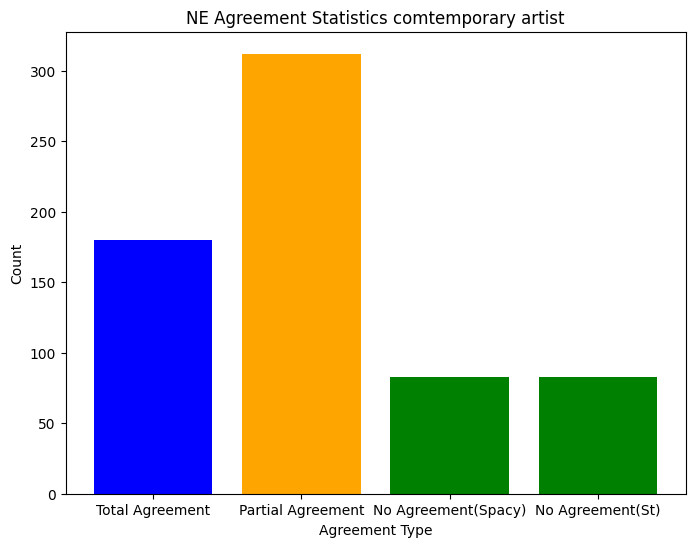

In [19]:
data = {
    'Total Agreement': comtemporary['Total Agreement'][0],
    'Partial Agreement': comtemporary['Partial Agreement'][0],
    'No Agreement(Spacy)': comtemporary['No Agreement (SpaCy)'][0],
    'No Agreement(St)': comtemporary['No Agreement (Stanza)'][0], #the name was shortened for clarity in the visualisation
}

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(data.keys(), data.values(), color=['blue', 'orange', 'green', 'green'])

# Add labels and title
plt.xlabel('Agreement Type')
plt.ylabel('Count')
plt.title('NE Agreement Statistics comtemporary artist')

#save the plot
plt.savefig('NE_agreement_ca.png')
# Show the plot
plt.show()

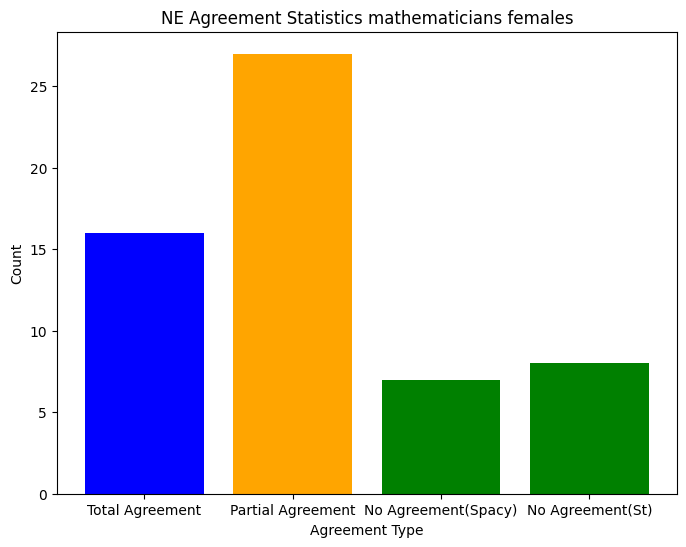

In [20]:
data = {
    'Total Agreement': FM['Total Agreement'][0],
    'Partial Agreement': FM['Partial Agreement'][0],
    'No Agreement(Spacy)': FM['No Agreement (SpaCy)'][0],
    'No Agreement(St)': FM['No Agreement (Stanza)'][0], #the name was shortened for clarity in the visualisation
}

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(data.keys(), data.values(), color=['blue', 'orange', 'green', 'green'])

# Add labels and title
plt.xlabel('Agreement Type')
plt.ylabel('Count')
plt.title('NE Agreement Statistics mathematicians females')

#save the plot
plt.savefig('NE_agreement_fm.png')

# Show the plot
plt.show()